In [155]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import copy


In [156]:
df.info()
df.Marks.max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


55.299

Text(0.5, 1.0, 'number of courses vs marks')

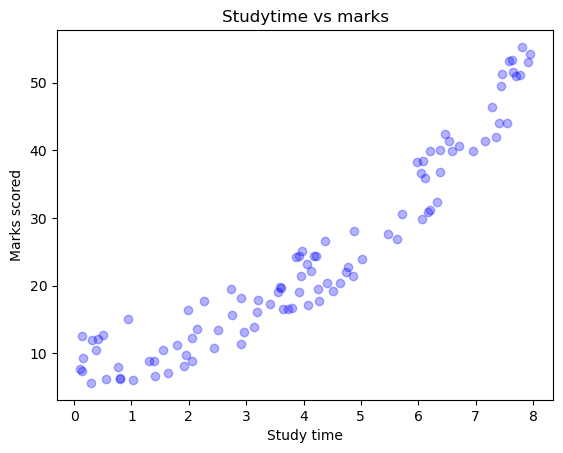

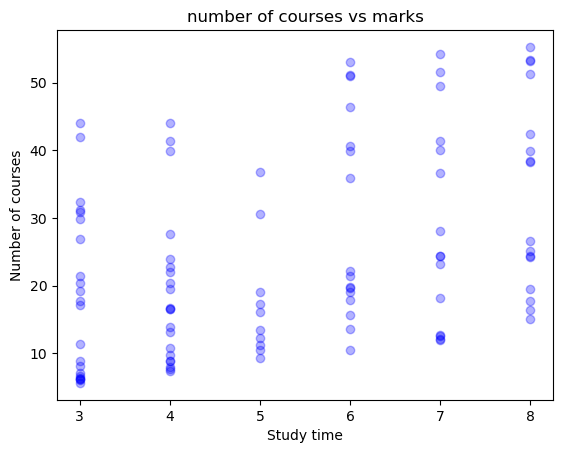

In [157]:
marks_=df['Marks']
time_=df['time_study']
nc_=df['number_courses']
# figure 1 marks vs study time
plt.figure()
plt.scatter(time_,marks_,c="blue",alpha=0.3)
plt.xlabel("Study time")
plt.ylabel("Marks scored")
plt.title("Studytime vs marks")
#figure 2 marks vs number of courses
plt.figure()
plt.scatter(nc_,marks_,c="blue",alpha=0.3)
plt.xlabel("Study time")
plt.ylabel("Number of courses")
plt.title("number of courses vs marks")

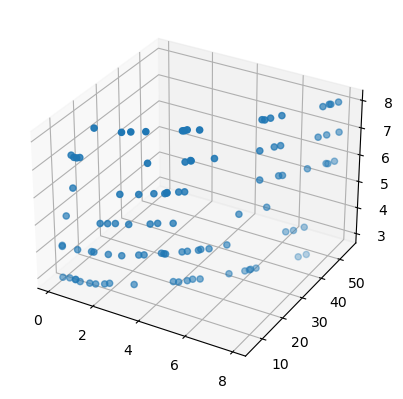

In [158]:
threex=plt.axes(projection="3d")
threex.scatter(time_,marks_,nc_)

In [159]:
df=pd.df=pd.read_csv("/Users/karthiksrinivas/Desktop/Student_Marks.csv")
w_initial=np.zeros(2)
b_initial=0

In [160]:
def predictor(x, w, b):
    return np.dot(x, w) + b

def cost(x, y, w, b):
    n = x.shape[0]
    total_cost = np.sum((predictor(x, w, b) - y) ** 2)
    return total_cost / (2 * n)

In [161]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    n = x.shape[1]  
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        err = predictor(x[i], w, b) - y[i]
        dj_dw += err * x[i]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [162]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i < 100000:
            J_history.append(cost_function(X, y, w, b))
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    return w, b, J_history

In [163]:
x = df[df.columns[0:2]].values
y = df['Marks'].values
w_initial = np.zeros(2)
b_initial = 0
w, b, j = gradient_descent(x, y, w_initial, b_initial, cost, compute_gradient, 0.009, 3000)
print(w)
print(b)


Iteration    0: Cost   139.40
Iteration  300: Cost     7.76
Iteration  600: Cost     7.11
Iteration  900: Cost     6.71
Iteration 1200: Cost     6.46
Iteration 1500: Cost     6.31
Iteration 1800: Cost     6.21
Iteration 2100: Cost     6.15
Iteration 2400: Cost     6.12
Iteration 2700: Cost     6.10
[1.76595266 5.36789548]
-6.746934441300716


In [164]:
#our w is [1.77818327 5.3717958 ] and b is -6.8535382
# f(x)=1.77818327x1+5.3717958x2-6.8535382
#where x1 is the number of courses and x2 is time study
k=df.shape[0]
p=[]
for i in range(k):
    predic=predictor(x[i],w,b)
    p.append(predic)
    print("expected value",marks_[i],"got value",predic)



expected value 19.202 got value 22.749396365583074
expected value 7.734 got value 0.8321941519528337
expected value 13.811 got value 17.13449273338268
expected value 53.018 got value 46.303466872946665
expected value 55.299 got value 49.30931842907665
expected value 17.822 got value 21.085093894495095
expected value 29.889 got value 31.096473841422196
expected value 17.264 got value 20.403456125306878
expected value 20.348 got value 23.989295264988183
expected value 30.862 got value 31.686942344536213
expected value 42.036 got value 38.021059014304804
expected value 12.132 got value 7.885353945020954
expected value 24.318 got value 28.256517302454697
expected value 17.672 got value 21.493308822595065
expected value 11.397 got value 14.160763593015488
expected value 19.466 got value 23.184110942559972
expected value 30.548 got value 32.78182310876991
expected value 38.49 got value 40.01749134825509
expected value 50.986 got value 45.24062356734143
expected value 25.133 got value 28.7288

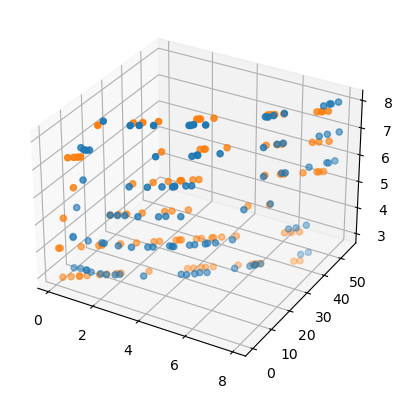

In [165]:
threex=plt.axes(projection="3d")
threex.scatter(time_,marks_,nc_)
threex.scatter(time_,p,nc_)

Text(0.5, 1.0, 'number of courses vs marks')

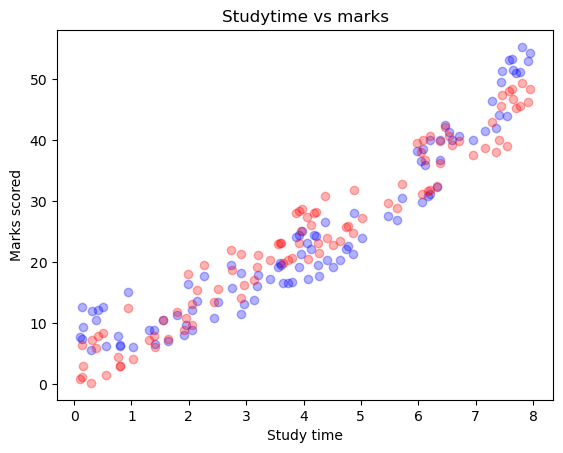

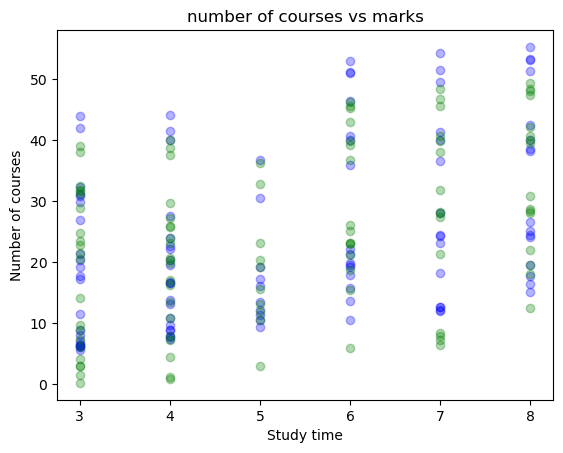

In [166]:
marks_=df['Marks']
time_=df['time_study']
nc_=df['number_courses']
# figure 1 marks vs study time
plt.figure()
plt.scatter(time_,marks_,c="blue",alpha=0.3)
plt.scatter(time_,p,c="red",alpha=0.3)
plt.xlabel("Study time")
plt.ylabel("Marks scored")
plt.title("Studytime vs marks")
#figure 2 marks vs number of courses
plt.figure()
plt.scatter(nc_,marks_,c="blue",alpha=0.3)
plt.scatter(nc_,p,c="green",alpha=0.3)

plt.xlabel("Study time")
plt.ylabel("Number of courses")
plt.title("number of courses vs marks")